Скрипт для просмотра выплаченных дивидендов по акциям ММВБ. 

Данные берутся с http://iss.moex.com.
Дивидендные выплаты группирутся по годам, для наглядности выводятся в виде столбчатых диаграм.

In [1]:
import pandas as pd
from datetime import datetime 
import matplotlib.pyplot as plt

In [2]:
#тикер акции для анализа дивидендов
stock = 'LKOH'

In [3]:
#получаем данные с сайта биржи
df = pd.read_xml("http://iss.moex.com/iss/securities/" + stock + "/dividends.xml", xpath="//row")

In [6]:
#проверяем эти данные
df

,secid,isin,registryclosedate,value,currencyid
0,LKOH,RU0009024277,2013-08-15,50,RUB
1,LKOH,RU0009024277,2014-07-15,60,RUB
2,LKOH,RU0009024277,2014-12-26,60,RUB
3,LKOH,RU0009024277,2015-04-28,94,RUB
4,LKOH,RU0009024277,2015-07-14,94,RUB
5,LKOH,RU0009024277,2015-07-17,94,RUB
6,LKOH,RU0009024277,2015-12-24,65,RUB
7,LKOH,RU0009024277,2016-07-12,112,RUB
8,LKOH,RU0009024277,2016-12-23,75,RUB
9,LKOH,RU0009024277,2017-07-10,120,RUB


In [7]:
#информация
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   secid              21 non-null     object
 1   isin               21 non-null     object
 2   registryclosedate  21 non-null     object
 3   value              21 non-null     int64 
 4   currencyid         21 non-null     object
dtypes: int64(1), object(4)
memory usage: 968.0+ bytes


In [8]:
#"вытащим" из столбца с датой закрытия реестра год и запишем его в новый столбец
df['year'] = df['registryclosedate'].map(lambda x: datetime.strptime(x, "%Y-%m-%d").year)

In [9]:
#проверка
df

,secid,isin,registryclosedate,value,currencyid,year
0,LKOH,RU0009024277,2013-08-15,50,RUB,2013
1,LKOH,RU0009024277,2014-07-15,60,RUB,2014
2,LKOH,RU0009024277,2014-12-26,60,RUB,2014
3,LKOH,RU0009024277,2015-04-28,94,RUB,2015
4,LKOH,RU0009024277,2015-07-14,94,RUB,2015
5,LKOH,RU0009024277,2015-07-17,94,RUB,2015
6,LKOH,RU0009024277,2015-12-24,65,RUB,2015
7,LKOH,RU0009024277,2016-07-12,112,RUB,2016
8,LKOH,RU0009024277,2016-12-23,75,RUB,2016
9,LKOH,RU0009024277,2017-07-10,120,RUB,2017


In [10]:
#новый датафрейм, с группировкой по году, дивиденды просуммируем
df_by_year = df.groupby(['year']).sum()

In [11]:
#проверка
df_by_year

,value
year,
2013,50
2014,120
2015,347
2016,187
2017,205
2018,225
2019,347
2020,396
2021,553


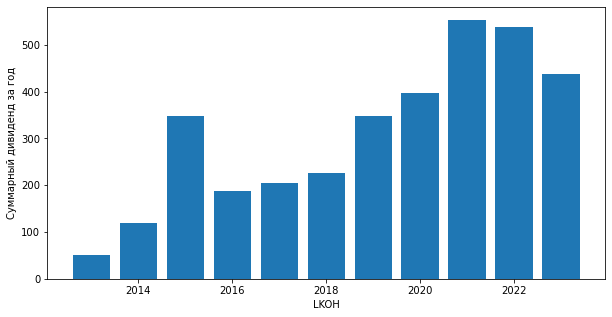

In [12]:
#рисуем столбчатые графики для наглядности
plt.figure(figsize=(10, 5))
plt.bar(df_by_year.index,df_by_year['value'])
plt.ylabel('Суммарный дивиденд за год')
plt.xlabel(stock)
plt.show()

In [13]:
#можно прогнать сразу список из тикеров
stocks = ['LKOH', 'GAZP', 'SBERP', 'ROSN', 'VTBR', 'AKRN']

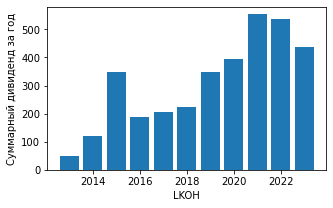

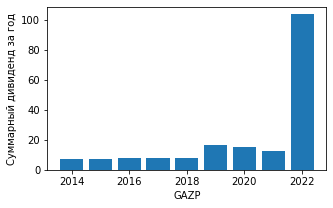

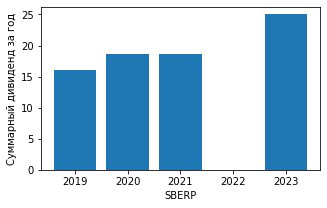

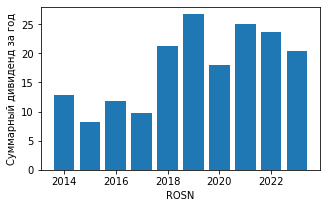

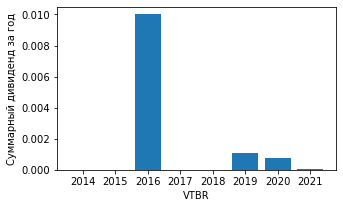

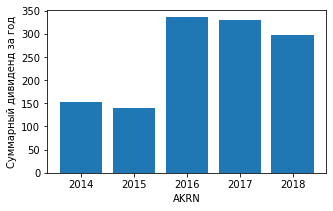

In [14]:
for stock in stocks:
    #получаем данные с сайта биржи
    test = pd.read_xml("http://iss.moex.com/iss/securities/" + stock + "/dividends.xml", xpath="//row")
    #"вытащим" из столбца с датой закрытия реестра год и запишем его в новый столбец
    test['year'] = test['registryclosedate'].map(lambda x: datetime.strptime(x, "%Y-%m-%d").year)
    #сгруппируем по году, дивиденды просуммируем, в новый датафрейм
    test_by_year = test.groupby(['year']).sum()
    plt.figure(figsize=(5, 3))
    plt.bar(test_by_year.index,test_by_year['value'])
    plt.ylabel('Суммарный дивиденд за год')
    plt.xlabel(stock)
    plt.show()